In [383]:
import pandas as pd
import requests
import json 
import numpy as np
import matplotlib.pyplot as pl

In [384]:
import os
import pickle
import geopandas as gpd
from shapely.geometry import Polygon, Point

In [460]:
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA


In [772]:
threshold = 95
data_location = '../../data/threshold_{}percentile/ca_data_version_3.csv'.format(threshold)

In [773]:
solar = pd.read_csv(data_location)
solar.drop(columns='Unnamed: 0', index=1, inplace = True)

In [774]:
solar

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,29.0,NaN,5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,42.0496
2,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,428.0,NaN,5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,355.8478
3,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,781.0,NaN,6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,335.9567
4,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,509.0,NaN,6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,162.4310
5,33.006976,-115.368227,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-18.0,NaN,6.522267,"[137445.7601778919, 137112.0831232151, 161834....","[175.5217160609371, 176.6422237862802, 213.189...","[5.66199084067539, 6.308650849510008, 6.877083...","[143791.039953705, 143466.3582502891, 169346.8...",1.764211e+06,42.8320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,11.2750
4996,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,312.0,land_cover,5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,30.3699
4997,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,138.0,land_cover,6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,259.8465
4998,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,760.0,land_cover,5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,47.8689


In [775]:
solar[solar['Solar_farm_present']==1]['land_cover'].values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [776]:
solar.columns


Index(['Latitude', 'Longitude', 'Solar_farm_present', 'State', 'panel.area',
       'power', 'panels', 'landscape.area', 'water', 'urban', 'Address',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')

In [777]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,4999.000000,4999.000000,2617.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,4999.000000,4999.000000,4999.000000,4999.000000,4.999000e+03,4961.000000
mean,36.605523,-119.170746,0.077570,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.839968,4.226845,546.781556,6.080839,1.695402e+06,131.289925
std,2.525155,2.661160,0.267544,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.366672,7.238364,597.172869,0.549373,1.444738e+05,124.413834
min,32.557231,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.206421,1.224815e+06,0.514500
25%,34.532197,-121.408543,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,50.000000,5.710147,1.599907e+06,34.074400
50%,36.155188,-119.898464,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,339.000000,6.051163,1.686388e+06,84.747900
75%,38.462574,-116.856734,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,4.000000,886.500000,6.595380,1.828474e+06,199.361400
max,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,49.000000,3835.000000,6.994842,1.995563e+06,604.130600


In [778]:
solar.head()

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,29.0,NaN,5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,42.0496
2,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,428.0,NaN,5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,355.8478
3,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,781.0,NaN,6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,335.9567
4,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,509.0,NaN,6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,162.4310
5,33.006976,-115.368227,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-18.0,NaN,6.522267,"[137445.7601778919, 137112.0831232151, 161834....","[175.5217160609371, 176.6422237862802, 213.189...","[5.66199084067539, 6.308650849510008, 6.877083...","[143791.039953705, 143466.3582502891, 169346.8...",1.764211e+06,42.8320


In [779]:
solar = solar[solar['min_distance'].notnull()]
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,4961.000000,4961.000000,2580.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,4961.000000,4961.000000,4961.000000,4961.000000,4.961000e+03,4961.000000
mean,36.631992,-119.176108,0.078682,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.845797,4.250353,550.754687,6.084885,1.696129e+06,131.289925
std,2.516461,2.670611,0.269294,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.361179,7.248930,597.658743,0.549129,1.446759e+05,124.413834
min,32.557231,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.206421,1.224815e+06,0.514500
25%,34.551751,-121.408543,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,52.000000,5.716487,1.600763e+06,34.074400
50%,36.174742,-119.920037,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,347.000000,6.059842,1.688365e+06,84.747900
75%,38.482128,-116.835161,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,5.000000,890.000000,6.597143,1.829020e+06,199.361400
max,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,49.000000,3835.000000,6.994842,1.995563e+06,604.130600


In [780]:
solar = solar[solar['Solar_farm_present'].notnull()]

In [781]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,2580.000000,2580.000000,2580.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,2580.000000,2580.000000,2580.000000,2580.000000,2.580000e+03,2580.000000
mean,37.284673,-119.774180,0.078682,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.703488,6.734884,786.920930,5.947834,1.669791e+06,156.045791
std,2.695400,2.553688,0.269294,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.456808,9.249811,705.353529,0.619784,1.651291e+05,129.604262
min,32.557231,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-80.000000,4.206421,1.224815e+06,1.999200
25%,35.060158,-121.818422,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,0.000000,0.000000,49.000000,5.581160,1.570823e+06,48.529100
50%,36.917799,-120.265198,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,3.000000,781.500000,5.919797,1.658180e+06,117.890200
75%,39.758034,-117.606380,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,10.000000,1301.500000,6.540376,1.827518e+06,246.961350
max,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,49.000000,3835.000000,6.994842,1.995563e+06,604.130600


In [782]:
solar_existing = solar[solar['Solar_farm_present']==1]
solar_non_existing = solar[solar['Solar_farm_present']==0]
solar_non_existing_sample = solar_non_existing.sample(300, random_state = 42)
solar = pd.concat([solar_existing, solar_non_existing_sample])
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,503.000000
mean,36.544871,-119.336849,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.807157,5.053678,681.159046,6.084047,1.700310e+06,113.968727
std,2.602257,2.336146,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.394924,8.339838,688.736633,0.550824,1.461790e+05,119.983950
min,32.655002,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-70.000000,4.232018,1.231156e+06,2.173700
25%,34.659298,-121.192818,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,57.000000,5.734941,1.608894e+06,24.142850
50%,35.627227,-118.949272,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,588.000000,6.080469,1.689425e+06,66.154500
75%,38.452797,-117.460765,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,6.000000,1063.000000,6.590222,1.836439e+06,173.130700
max,42.001868,-114.246454,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,46.000000,3835.000000,6.994842,1.995563e+06,539.816100


In [783]:
req_col = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[req_col]
Y = solar['Solar_farm_present']

In [815]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

sd = StandardScaler()
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
temp = np.hstack((sd.fit_transform(X_train_excluding_LC),X_train['land_cover'].values.reshape((-1,1))))
X_train_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC + ['land_cover'])

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
temp = np.hstack((sd.transform(X_test_excluding_LC),X_test['land_cover'].values.reshape((-1,1))))
X_test_2 = pd.DataFrame(temp, columns = columns_ML_excluding_LC+['land_cover'])


assert np.sum(np.abs(X_test_2['land_cover'].values - X_test['land_cover'].values)) == 0
assert np.sum(np.abs(X_train_2['land_cover'].values - X_train['land_cover'].values)) == 0

X_test = X_test_2
X_train = X_train_2

col_index = {'slope':0, 'elevation':1,  'solrad_annual':2,'ac_annual':3, 'min_distance':4,'land_cover':5}
index_col = {0:'slope', 1:'elevation',  2:'solrad_annual',3:'ac_annual', 4:'min_distance',5:'land_cover'}

In [816]:
len(X_train),len(X_test)

(402, 101)

In [817]:
svm = SVC(kernel='rbf', gamma=0.1, C=1.0, random_state= 113)

params = {"C":(0.1, 1, 2,4),  
          "kernel":('linear', 'rbf','poly')}

svm_cv = GridSearchCV(svm, params, scoring="accuracy", n_jobs=-1, verbose=2, cv=5)
svm_cv.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1,

GridSearchCV(cv=5, estimator=SVC(gamma=0.1, random_state=113), n_jobs=-1,
             param_grid={'C': (0.1, 1, 2, 4),
                         'kernel': ('linear', 'rbf', 'poly')},
             scoring='accuracy', verbose=2)

In [818]:
svm_cv.best_params_

{'C': 4, 'kernel': 'rbf'}

In [823]:
# svm_tuned = SVC(**svm_cv.best_params_, random_state=113)
svm_tuned = SVC(C=4,kernel='rbf',random_state=113)
pca = PCA(n_components=6)

Xreduced = pca.fit_transform(X_train)
# Xreduced = np.vstack([X_train['ac_annual'].values, X_train['solrad_annual'].values]).T
print(Xreduced.shape,y_train.shape)

svm_tuned.fit(Xreduced, y_train)
y_pred_train_svm = svm_tuned.predict(Xreduced) 
Xreducedtest = pca.transform(X_test)
# Xreducedtest = np.vstack([X_test['ac_annual'].values, X_test['solrad_annual'].values]).T

y_pred_test_svm = svm_tuned.predict(Xreducedtest)

(402, 6) (402,)


[0.26228957 0.45968058 0.56563051 0.5780388  0.19418061 0.2153398 ] [0.26228957 0.45968058 0.56563051 0.5780388  0.19418061 0.16770545] 2.335349905915105
[ 0.38598945  0.44016647 -0.38307164 -0.35018927  0.62201708 -0.04412804] [ 0.38598945  0.44016647 -0.38307164 -0.35018927  0.62201708 -0.03136833] 1.6307064468303922
[ 0.86047643 -0.17165908 -0.0285524  -0.07663582 -0.47164225  0.0574808 ] [ 0.86047643 -0.17165908 -0.0285524  -0.07663582 -0.47164225  0.03128531] 0.7922077760957493
[ 0.19900464 -0.74165581  0.1665933   0.16217573  0.59102382 -0.26445371] [ 0.19900464 -0.74165581  0.1665933   0.16217573  0.59102382 -0.08354856] 0.30634665440605346
[ 4.50600193e-02  1.18130640e-01 -3.39003386e-06  1.86503164e-01
 -5.56119722e-02 -8.44384820e+00] [ 4.50600193e-02  1.18130640e-01 -3.39003385e-06  1.86503164e-01
 -5.56119722e-02 -9.72696574e-01] 0.08636045377189533
[-0.01278245  0.03836956  0.71045737 -0.69013127  0.02324603 -6.43345953] [-0.01278245  0.03836956  0.71045737 -0.69013127  0.

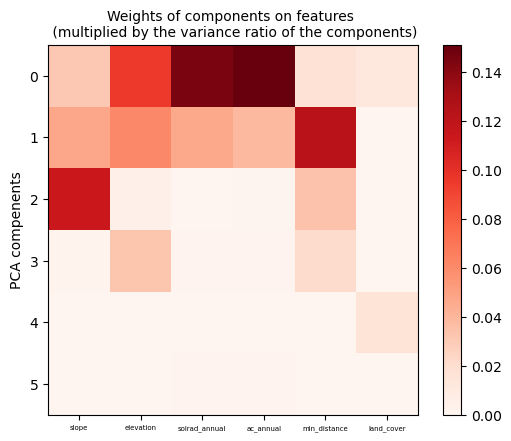

In [824]:
components = pca.components_ #eigenvectors of pca
num_com = components.shape[0]
eigvals = pca.explained_variance_ #eigenvalues of pca
covariance = np.dot(X_train.T,X_train)/(X_train.shape[0]-1)

# checking the SVD decompostion
for i in range(components.shape[0]):
    temp = np.dot(covariance,components[i])/eigvals[i]
    print(temp,components[i],eigvals[i])
    # assert np.mean(np.abs(temp-components[i])) < 1e-8
    # eigvals.append(np.dot(temp,components[i]))

var_ratio = pca.explained_variance_ratio_
print("\n Varaiance covered as we increasing the number of PCA components: ", np.cumsum(var_ratio))

fig,ax = pl.subplots()
img = ax.imshow(components[:,:]**2*var_ratio.reshape((num_com,1)),cmap='Reds')
pl.colorbar(img)
ax.set_xticks([0,1,2,3,4,5])
ax.set_xticklabels([index_col[i] for i in range(components.shape[1])],fontsize=5)
ax.set_ylabel('PCA compenents',fontsize=10)
_ = ax.set_title('Weights of components on features \n (multiplied by the variance ratio of the components)',fontsize=10)

how much variance in PCA? Weights in different features using PCA.
Conclusion:
Decision boundaries, non-trivial points, key take away points, future improvements.

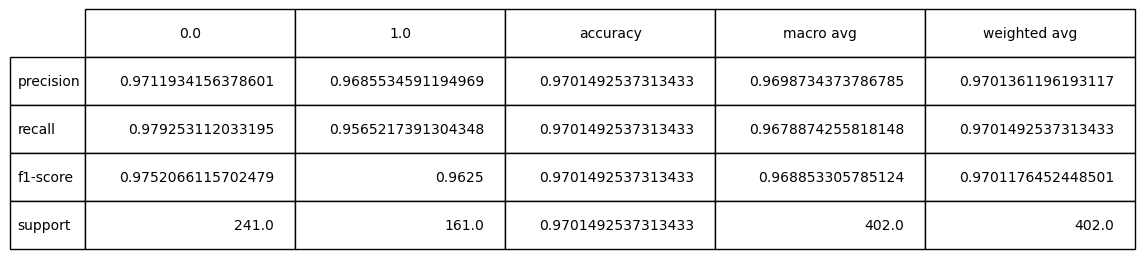

In [825]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

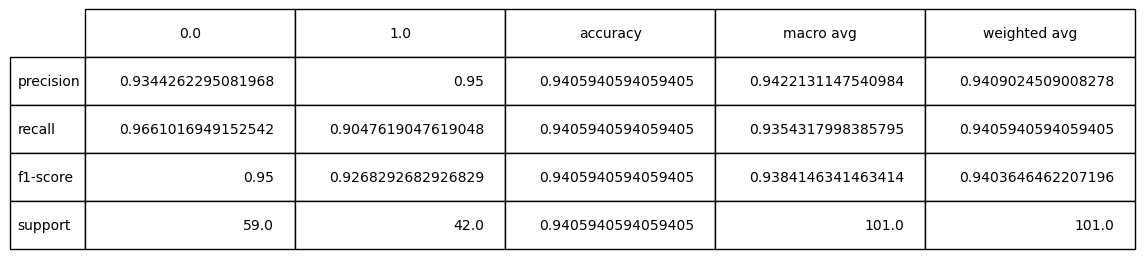

In [826]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

## Predicting on new solar farms

In [827]:
file_loc = 'new_farms.csv'
new_data = pd.read_csv(file_loc)
new_data = new_data.loc[new_data['Solar_farm_present']==1]
print(new_data.columns)

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Solar_farm_present',
       'land_cover', 'slope', 'elevation', 'feature_violated', 'solrad_annual',
       'ac_monthly', 'poa_monthly', 'solrad_monthly', 'dc_monthly',
       'ac_annual', 'min_distance'],
      dtype='object')


In [828]:
new_farms = new_data[columns_ML_excluding_LC+['land_cover']]

In [829]:
sd.transform(new_farms[columns_ML_excluding_LC])

array([[-0.60685679, -0.84791104, -0.18059374, -0.40063798, -0.56069304],
       [-0.48820094, -0.78249211,  1.05255283,  0.80814335, -0.13993989],
       [-0.60685679,  0.09557528,  1.11334425,  1.22640787, -0.7182304 ],
       ...,
       [-0.48820094,  0.1013903 ,  1.04813532,  1.04008078, -0.86826391],
       [-0.60685679, -1.02526902,  0.863479  ,  0.52433171, -0.82306238],
       [-0.36954509,  0.28601705,  1.23448376,  1.38026716, -0.63408694]])

In [830]:
temp = np.hstack((sd.transform(new_farms[columns_ML_excluding_LC]),new_farms['land_cover'].values.reshape((-1,1))))
new_farms = pd.DataFrame(temp, columns = columns_ML_excluding_LC+['land_cover'])
new_farms_reduced = pca.transform(new_farms)
# Xreducedtest = np.vstack([X_test['ac_annual'].values, X_test['solrad_annual'].values]).T

new_y_pred_test_svm = svm_tuned.predict(new_farms_reduced)

In [831]:
new_y_pred_test_svm

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/utkarshagrawal/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


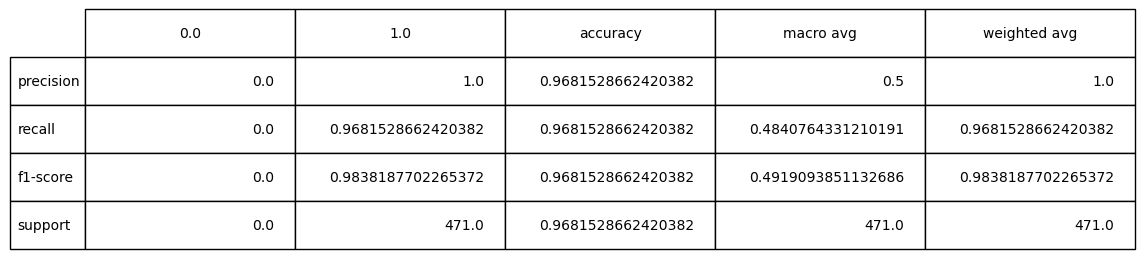

In [832]:
df = pd.DataFrame(classification_report([1]*len(new_y_pred_test_svm), new_y_pred_test_svm, output_dict=True))
fig, ax = pl.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
pl.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

## Decision boundary

In [717]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [725]:
new_farms_reduced.shape

(471, 6)

(471, 2) (352, 2)
(471,)


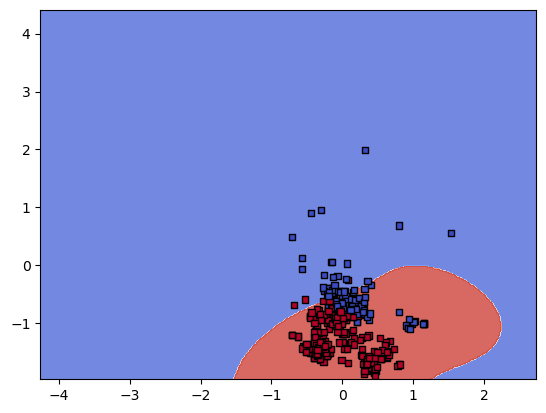

In [742]:
pca = PCA(n_components=2)
Xreduced = pca.fit_transform(X_train)
Xreduced = np.vstack([X_train['ac_annual'].values, X_train['min_distance'].values]).T

X0, X1 = Xreduced[:,0], Xreduced[:,1]
xx, yy = make_meshgrid(X0, X1)

model = SVC(kernel='rbf',C=4)
clf = model.fit(Xreduced, y_train)

farms_reduced = np.vstack([new_farms['ac_annual'].values,new_farms['min_distance']]).T

# farms_reduced = pca.transform(new_farms)
print(farms_reduced.shape,Xreduced.shape)
new_y_pred_test_svm = model.predict(farms_reduced)

fig, ax = pl.subplots()
plot_contours(ax, clf, xx, yy, cmap=pl.cm.coolwarm, alpha=0.8)
# ax.scatter(X0, X1, c=y_train, cmap=pl.cm.coolwarm, s=20, edgecolors='k')

print(new_farms_reduced[:,col_index['ac_annual']].shape)

ax.scatter(new_farms_reduced[:,col_index['ac_annual']],new_farms_reduced[:,col_index['elevation']], c=new_y_pred_test_svm, cmap=pl.cm.coolwarm, s=20, edgecolors='k',marker='s')

In [464]:
Xreduced

array([[-9.85330433e-01, -1.53908127e+00],
       [ 6.75998893e-01, -1.13967258e+00],
       [ 1.27149306e+00, -1.12725496e+00],
       [ 1.41531244e+00, -1.29152549e+00],
       [ 1.12756911e+00,  6.92467030e-01],
       [ 1.17700196e+00, -1.34560961e+00],
       [-3.00400353e-02,  8.91218778e-01],
       [ 2.25654407e+00,  1.57701756e-01],
       [ 6.64196258e-01, -1.34738158e+00],
       [-1.34405127e+00, -1.57303326e+00],
       [ 1.28673208e+00,  2.91713989e+00],
       [-1.43934881e-01,  1.23430648e+00],
       [ 1.37237645e+00, -1.14928523e+00],
       [-2.98559371e-01, -8.74378397e-02],
       [ 2.30585727e+00,  8.06850499e-01],
       [ 1.30533170e+00, -1.28396824e+00],
       [ 1.36303129e+00, -1.21201882e+00],
       [ 1.43558059e+00,  2.33135540e+00],
       [-1.07054560e+00, -1.49481917e+00],
       [ 2.20937413e-01, -8.96865706e-01],
       [-1.14615069e+00, -1.21109393e+00],
       [ 1.39516865e+00,  2.20982800e+00],
       [ 1.05230736e+00, -1.40648053e+00],
       [ 6.

In [452]:
print(np.sum(np.abs(y_pred_train_svm - y_train.values))/len(y_train))
# thresholds
solar_slopes = solar.loc[solar['Solar_farm_present']==1]['slope'].values.copy()
solor_elevations = solar.loc[solar['Solar_farm_present']==1]['elevation'].values.copy()
solar_distance = solar.loc[solar['Solar_farm_present']==1]['min_distance'].values.copy()
solar_ac_annual = solar.loc[solar['Solar_farm_present']==1]['ac_annual'].values.copy()

slope_threshold = np.percentile(solar_slopes,threshold)
elevations_threshold = np.percentile(solor_elevations,threshold)
distance_threshold = np.percentile(solar_distance,threshold)
ac_threshold = np.percentile(solar_ac_annual,threshold)
print('slope_th:{}, elevation_th:{}, distance_th:{}, ac_th:{}'.format(slope_threshold,elevations_threshold,distance_threshold,ac_threshold))

print(np.sum(np.abs(y_pred_test_svm - y_test.values))/len(y_test))

0.019886363636363636
slope_th:20.93999999999997, elevation_th:976.96, distance_th:406.78717999999907, ac_th:1901117.26053907
0.013245033112582781


In [454]:
X_train

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
0,-0.836029,-0.077482,0.975535,0.947692,-0.942847,1.0
1,-0.836029,-1.056516,-0.061279,-0.195445,-0.403599,1.0
2,-0.836029,-1.175797,-0.489869,-0.577363,-0.645999,1.0
3,-0.836029,-1.188189,-0.521213,-0.448278,-0.908406,0.0
4,-0.748366,0.568495,-1.157300,-1.043854,0.449924,1.0
...,...,...,...,...,...,...
347,-0.748366,-0.021714,1.079009,1.040847,-0.900710,1.0
348,-0.047069,1.051815,-0.947526,-0.747917,1.558795,1.0
349,0.566567,-0.021714,-2.119433,-2.263688,0.999513,0.0
350,-0.397717,1.301221,-1.139931,-0.902981,1.231676,1.0


In [ ]:
fake_data = 